# Etude de BMI

Ce notebook a pour but d'étudier l'importance de la variable BMI sur le dataset sur la variable targuet : charges

# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# formatage dataset

In [2]:

df = pd.read_csv("data/medical_insurance.csv", sep=",")
le_smoker = LabelEncoder()
df["smoker"] = le_smoker.fit_transform(df["smoker"])

le_sex = LabelEncoder()
df["sex"] = le_sex.fit_transform(df["sex"])

oh_region = OneHotEncoder()
region_encoded = oh_region.fit_transform(df["region"].values.reshape(-1, 1)).toarray()
df_region_encoded = pd.DataFrame(region_encoded, columns=["northeast", "northwest", "southeast", "southwest"])
df = pd.concat([df, df_region_encoded], axis=1)
df.drop("region", axis=1, inplace=True)

In [3]:
q1 = df["charges"].quantile(0.25)
q2 = df["charges"].quantile(0.5)
q3 = df["charges"].quantile(0.75)

df["charges_cat"] = df["charges"].apply(lambda x: 1 if x < q1 else 2 if x < q2 else 3 if x < q3 else 4)


In [4]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,charges_cat
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0,4
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0,1
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0,1
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0,4
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0,1


<Axes: xlabel='bmi', ylabel='charges'>

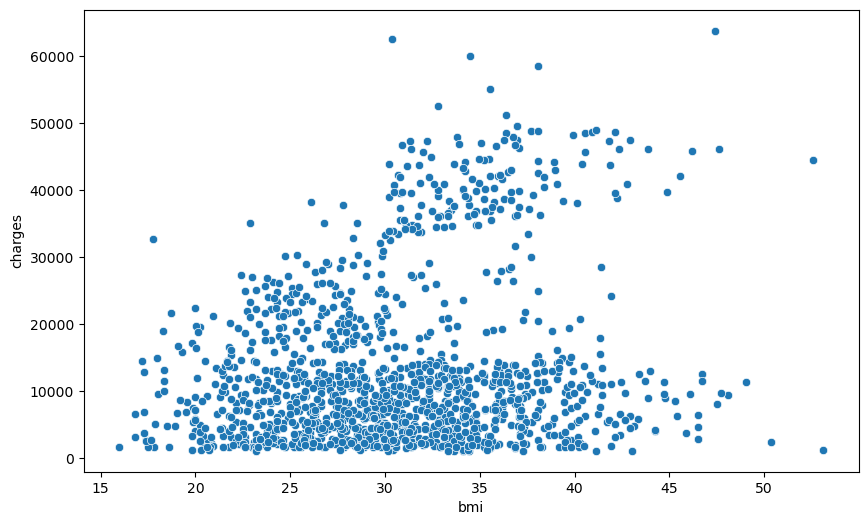

In [5]:
# Distribution des charges en fonction de BMI

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["bmi"], y=df["charges"])



In [6]:
df["bmi"].describe()

count    2772.000000
mean       30.701349
std         6.129449
min        15.960000
25%        26.220000
50%        30.447500
75%        34.770000
max        53.130000
Name: bmi, dtype: float64

On va diviser en 4 categorie les BMI

In [7]:
q1 = df["bmi"].quantile(0.25)
q2 = df["bmi"].quantile(0.5)
q3 = df["bmi"].quantile(0.75)

print(f"les quartiles de la variable bmi sont : {q1}, {q2}, {q3}")

df["bmi_cat"] = df["bmi"].apply(lambda x: 1 if x < q1 else 2 if x < q2 else 3 if x < q3 else 4)

les quartiles de la variable bmi sont : 26.22, 30.447499999999998, 34.77


/home/g/anaconda3/envs/sy09/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

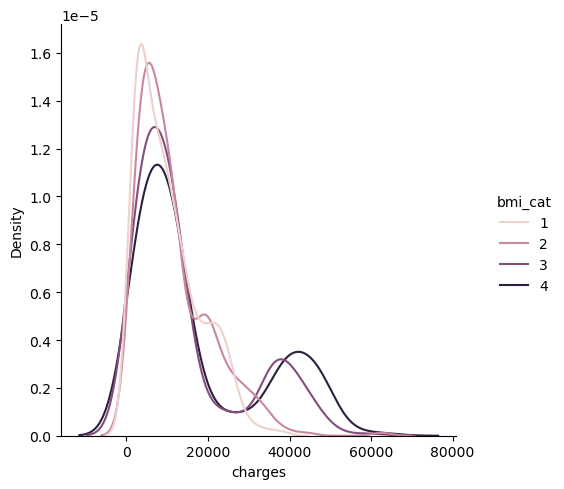

In [8]:
plt.figure(figsize=(10, 6))

sns.displot(df, x="charges", hue="bmi_cat", kind="kde", )

Il semble que les cat 3 et 4 sont importante pour les charges >30 000

(340, 12)


/home/g/anaconda3/envs/sy09/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

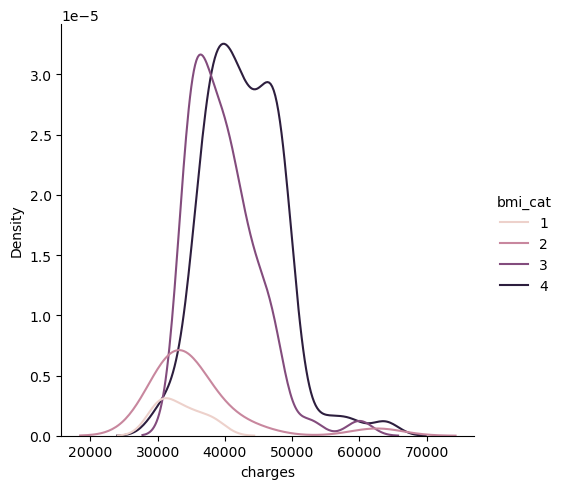

In [9]:
#charges > 30000  repartition des charges en fonction de bmi_cat
df_30000_60000 = df[(df["charges"] > 30000)]
print(df_30000_60000.shape)

plt.figure(figsize=(10, 6))

sns.displot(df_30000_60000, x="charges", hue="bmi_cat", kind="kde")

<Axes: ylabel='count'>

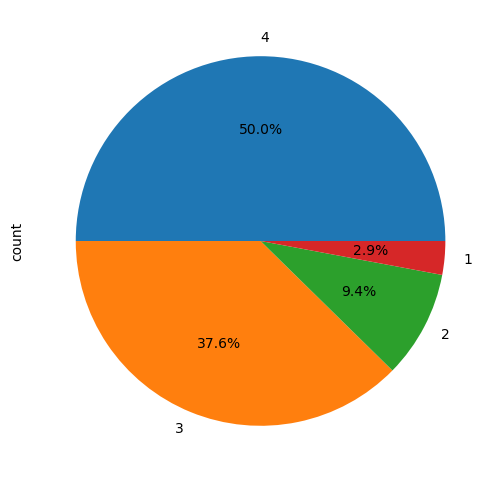

In [10]:
# pie plot 
plt.figure(figsize=(10, 6))
df_30000_60000["bmi_cat"].value_counts().plot.pie(autopct="%1.1f%%")

In [11]:
df_30000_60000["bmi_cat"].value_counts()

bmi_cat
4    170
3    128
2     32
1     10
Name: count, dtype: int64

87 % des 340 assurances es plus couteuses sont des persoones avec un bmi > 30.447499999999998

50% des 340 assurances es plus couteuses sont des persoones avec un bmi > 34.77

faire les categorie selon 


IMC (kg/m2) 	Interprétation
moins de 16,5 	dénutrition
16,5 à 18,5- 	maigreur
18,5 à 25- 	poids normal
25 à 30- 	surpoids
30 à 35- 	obésité modérée
35 à 40- 	obésité sévère
40 et plus 	obésité morbide ou massive

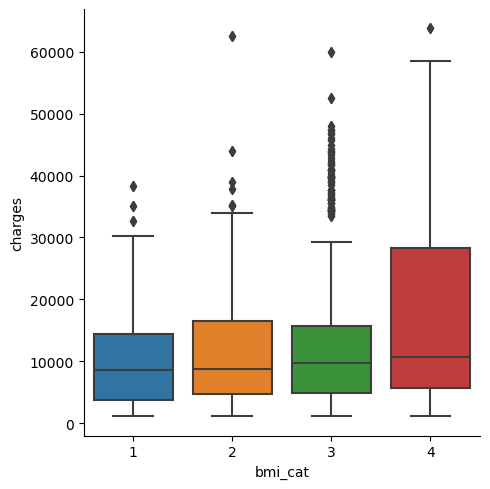

In [12]:
sns.catplot(x="bmi_cat", y="charges", data=df, kind="box")

<Axes: >

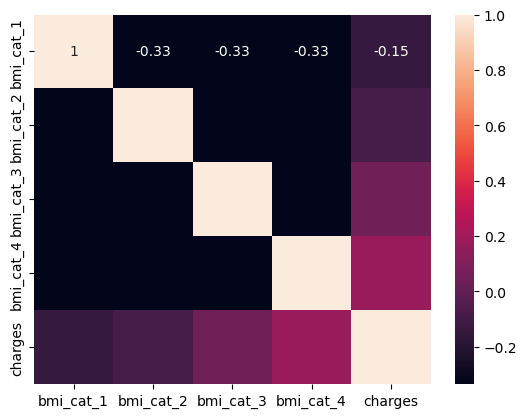

In [13]:
# correlation entre charges et bmi_cat
df_bmi_encoded = pd.get_dummies(df["bmi_cat"], prefix="bmi_cat")
df_bmi_encoded["charges"] = df["charges"]

sns.heatmap(df_bmi_encoded.corr(), annot=True)



plus bmi est grand plus il est correlé au charges

## Etude bmi + autre variable pour expliquer charge

In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest', 'charges_cat', 'bmi_cat'],
      dtype='object')

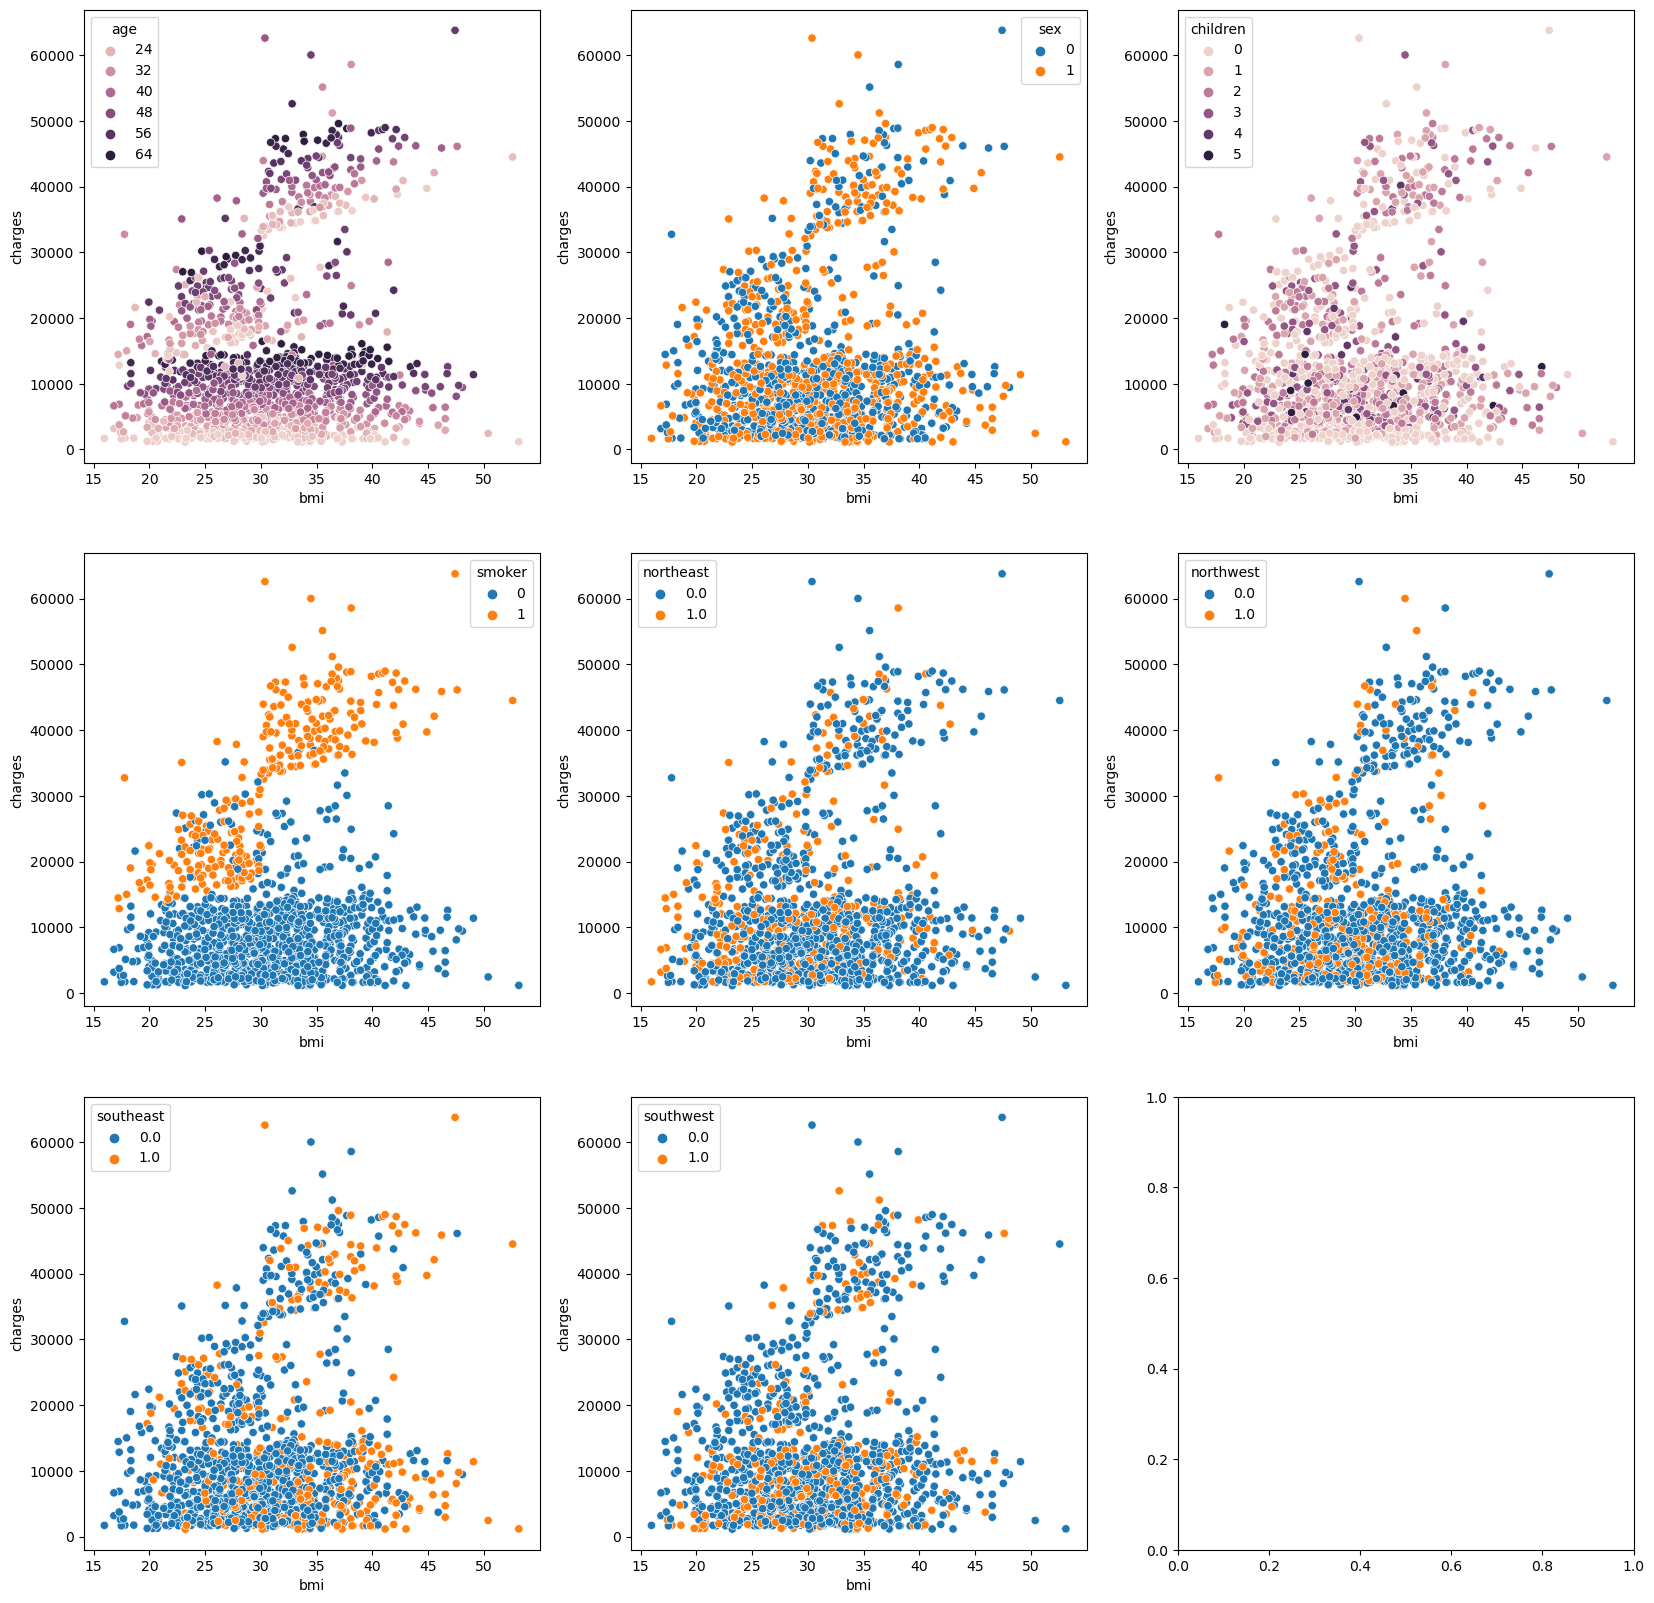

In [15]:
#bmi/charges hue in ['age', 'sex', 'children', 'smoker', 'northeast','northwest', 'southeast', 'southwest']

fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i in enumerate(['age', 'sex', 'children', 'smoker', 'northeast','northwest', 'southeast', 'southwest']):
    sns.scatterplot(x=df["bmi"], y=df["charges"], hue=df[i[1]], ax=axes[i[0]//3, i[0]%3])


<Axes: xlabel='bmi', ylabel='charges'>

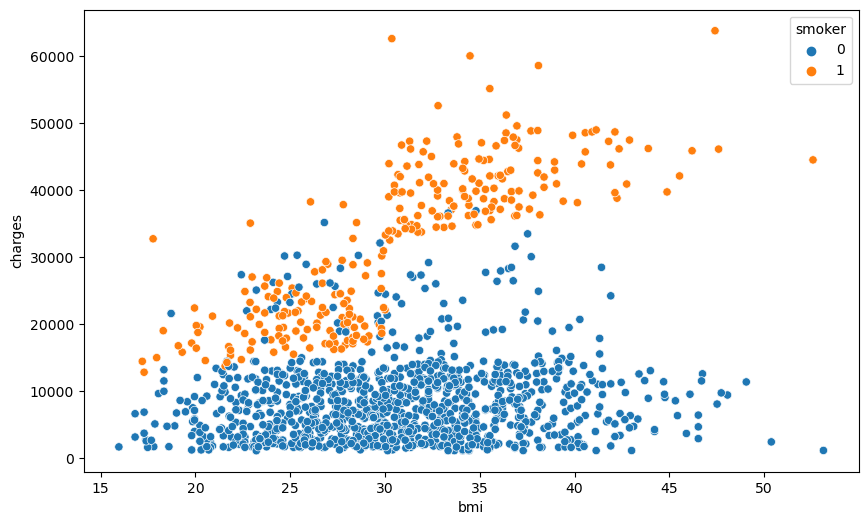

In [16]:
# etude bmi smoker
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["bmi"], y=df["charges"], hue=df["smoker"])


<Axes: xlabel='PC1', ylabel='PC2'>

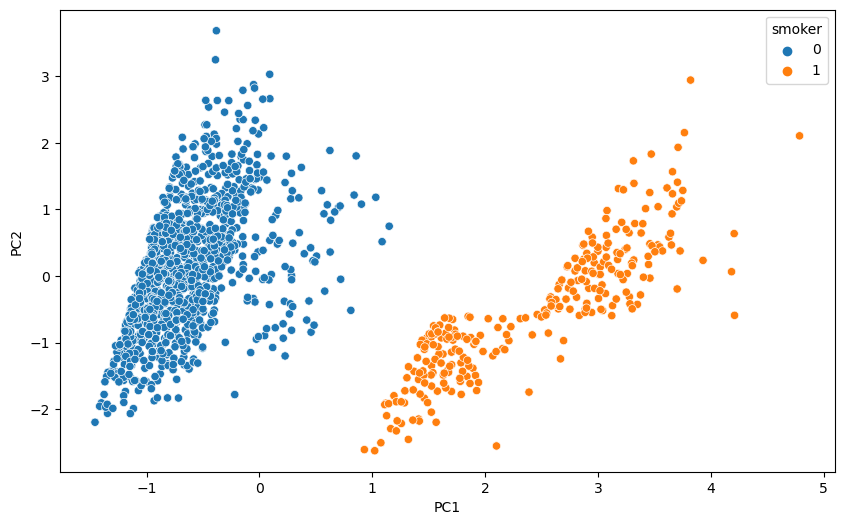

In [17]:
pca = PCA(n_components=3)
scaler = StandardScaler()

X = df[["bmi", "charges", "smoker"]]
X_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=["PC1", "PC2", "PC3"])
df_pca["smoker"] = df["smoker"]
df_pca["bmi"] = df["bmi"]
df_pca["bmi_cat"] = df["bmi_cat"]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["smoker"])

In [18]:
pca.explained_variance_ratio_

array([0.60550273, 0.33151015, 0.06298712])

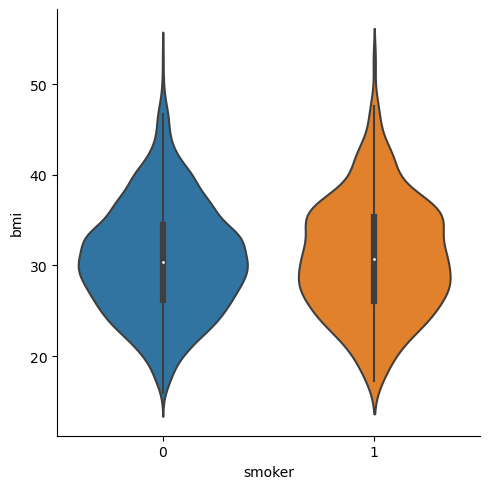

In [19]:

sns.catplot(x="smoker", y="bmi", data=df, kind="violin")